In [1]:
from ArcticTools import map
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import gridspec
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
%matplotlib inline

In [2]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [3]:
from scipy.interpolate import griddata

In [4]:
file_name='/ocean/xiaoxiny/research/data/Melanie-data/GEOTRACES2015_reformatted_byC_Corrected_3_Mel_2009.xlsx'


In [5]:
sheet_name='Sheet1'
xl_file= pd.ExcelFile(file_name)
dfs1 = xl_file.parse(sheet_name)
del dfs1['230-Th (fg/kg)']

In [6]:
sheet_name='Sheet2'
x2_file= pd.ExcelFile(file_name)
dfs2 = x2_file.parse(sheet_name)

In [7]:
col_titles = dfs1.columns
col_titles

Index(['Cruise', 'Station', 'yyyy-mm-ddThh:mm:ss.ss',
       'Longitude [degrees_east]', 'Latitude [degrees_north]',
       'Depth [metres]', '230Th(dmp/m3)', 'modelx', 'modely', 'reference'],
      dtype='object')

In [8]:
pieces = (dfs1,dfs2)

# Give the columns the same labels in each sub dataframe
# I've used numbers for convenience - you can give more descriptive names if you want
for sub_df in pieces:
    sub_df.columns=dfs1.columns

dfs = pd.concat(pieces, ignore_index = False)

In [9]:
# list all station names
stations = dfs['Station'].unique()
stations

array(['KC 500-2007', 'KC 2000-2007', 'KC 2700-2007', 'L1.1-2009',
       'L2-2009', '236-1', '239-1', '255-1', '260-2', '266-1', '276-1',
       '279-2', '301-2', '309-3', '328-2', '342-1', '363-5', '385-1',
       '400-1', '411-1', 'CB2', 'CB3', 'CB4', 'NB1', 'NB2', 'MB'], dtype=object)

In [10]:
bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
nemolon=bathy.variables['nav_lon'][400:,:]
nemolat=bathy.variables['nav_lat'][400:,:]
bathy=bathy.variables['Bathymetry'][400:,:]

In [11]:
# data before 2007

In [12]:
csv_file=('/ocean/xiaoxiny/research/data/Th-Pa_data_July2012.csv')
print ('columns',pd.read_csv(csv_file).columns)
csv_data = pd.read_csv(csv_file)
ref = csv_data['ref.'].convert_objects(convert_numeric=True).unique()
print (ref)

columns Index(['ref.', 'lat.', 'long.', 'depth', '230Th diss.', '230Th part.',
       '230Th tot.', '232Th diss.', '232Th part.', ' 232 Th tot.',
       '231Pa diss.', '231Pa part.', '231 tot.'],
      dtype='object')
[ nan   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.]


/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [13]:
# test function to make sure the groupby function is working
#csv_du = pd.DataFrame.copy(csv_data)
#df1= csv_du.groupby(['long.','lat.']).size().reset_index().rename(columns={0:'count'})

csv_du = pd.DataFrame.copy(csv_data)
df2=csv_du.groupby(['long.','lat.','ref.','230Th diss.','230Th tot.','depth']).size().reset_index().rename(columns={0:'count'})
#print (df2[(df2['long.']==-140.0)&(df2['lat.']==5.0)])

#merged = df1.merge(df2, indicator=True, how='outer')
# print ('differences between left dataset df1 and right df2',merged[merged['_merge'] == 'left_only'])

'''Result suggests that df2 can be used in grouping data; >>> df2: all data has the same lat/lon has been grouped; same lat/lon but with different #ref will be placed in a different group'''

'Result suggests that df2 can be used in grouping data; >>> df2: all data has the same lat/lon has been grouped; same lat/lon but with different #ref will be placed in a different group'

In [14]:
df2['depthmax'] = np.zeros_like(df2['long.'])
for num,sortlong,sortlat,sortref in zip(range (len(df2['long.'])),df2['long.'],df2['lat.'],df2['ref.']):
    df2['depthmax'][num] = csv_du['depth'][(csv_du['long.']==sortlong)&(csv_du['lat.']==sortlat)&(csv_du['ref.']==sortref)].max()
df2[(df2['long.']==-140.0)&(df2['lat.']==5.0)]

/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,long.,lat.,ref.,230Th diss.,230Th tot.,depth,count,depthmax
200,-140.0,5.0,13,-9.999,-9.999,1500.0,1,4432.0
201,-140.0,5.0,13,-9.999,0.537,835.0,1,4432.0
202,-140.0,5.0,13,-9.999,0.799,2200.0,1,4432.0
203,-140.0,5.0,13,-9.999,0.878,2900.0,1,4432.0
204,-140.0,5.0,13,-9.999,1.083,3600.0,1,4432.0
205,-140.0,5.0,13,-9.999,1.788,4432.0,1,4432.0
206,-140.0,5.0,19,-9.999,0.015,39.0,1,853.0
207,-140.0,5.0,19,-9.999,0.037,15.0,1,853.0
208,-140.0,5.0,19,-9.999,0.044,0.0,1,853.0
209,-140.0,5.0,19,-9.999,0.046,109.0,1,853.0


/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


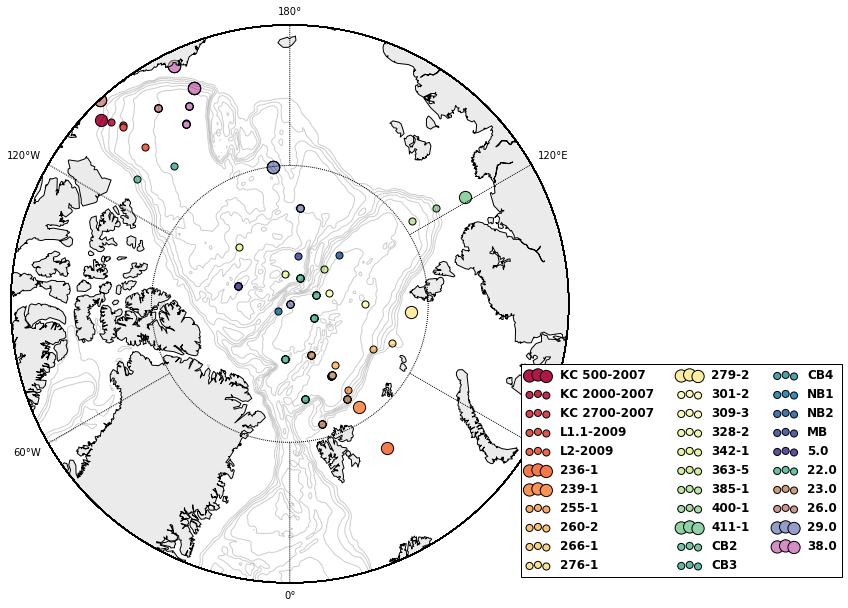

In [15]:
colors = np.vstack((cm.Spectral(np.linspace(0, 1, 28)),cm.Set2(np.linspace(0, 0.9, 10))))

fig = plt.figure(figsize=(10,10))
c_num = 1
m,_,_ = map.mapping(70,Gridkey='F')

        
for stn in stations:
    x_lon,y_lat = m(dfs['Longitude [degrees_east]'][dfs['Station'].str.contains(stn)].unique(),
                   dfs['Latitude [degrees_north]'][dfs['Station'].str.contains(stn)].unique())
    if np.max(dfs['Depth [metres]'][dfs['Station'].str.contains(stn)])<600:
        s = 150 # if max depth < 1500 (close to shore), then make its scatter larger
    else:
        s = 50
    m.scatter(x_lon,y_lat,c=colors[c_num],s=s,label=stn)
    c_num +=1
    
for ref_num in ref[1:]:
    
    if (df2['lat.'][df2['ref.'].convert_objects(convert_numeric=True)==ref_num].values > 70).any() == True:
        x_lon,y_lat = m(df2['long.'][df2['ref.'].convert_objects(convert_numeric=True)==ref_num].values,\
                        df2['lat.'][df2['ref.'].convert_objects(convert_numeric=True)==ref_num].values)

        s = 100 * ((df2['depthmax'][df2['ref.'].convert_objects(convert_numeric=True)==ref_num].values)<600) + 50
        for num in range (len(s)):
            if num ==0:
                m.scatter(x_lon[num],y_lat[num],c=colors[c_num],s=s[num],label=ref_num)
            else:
                m.scatter(x_lon[num],y_lat[num],c=colors[c_num],s=s[num])
        c_num+=1
        
plt.legend(loc=4,prop={'weight':'bold'},bbox_to_anchor=(1.5, 0),ncol=3)
plt.show()

In [16]:
stations[1]

'KC 2000-2007'

/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: convert_objects is deprecated.  Use the data-typ

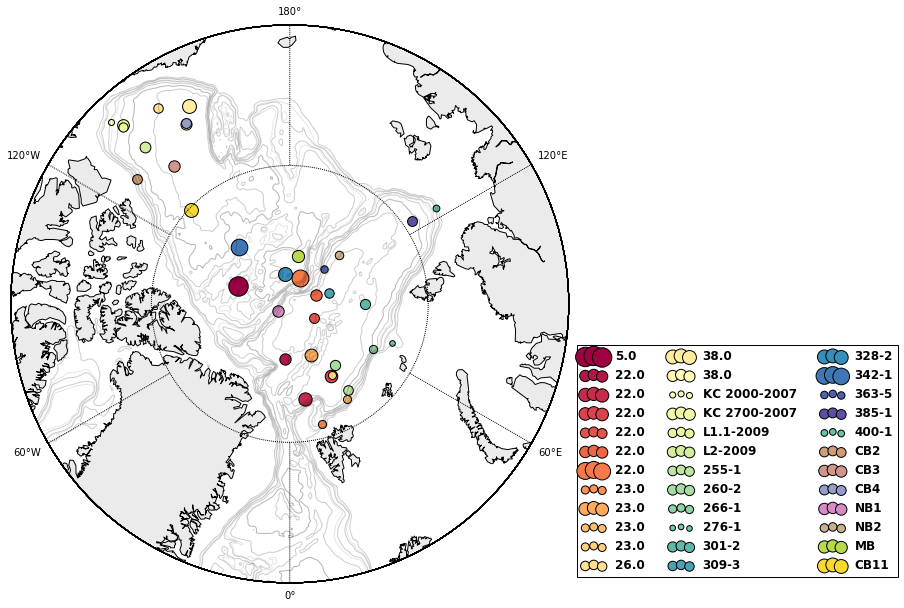

In [17]:
array500 = {'Station':[],'Lat':[],'Lon':[],'Th':[],'color':[]}
num = 1


#1: in previous database
for ref_num in ref[1:]:
    if (df2['lat.'][df2['ref.'].convert_objects(convert_numeric=True)==ref_num].values > 70).any() == True:
        lons = np.unique(df2['long.'][df2['ref.'].convert_objects(convert_numeric=True)==ref_num])
        for loc_num in range (len(lons)):
            if ref_num == 26:
                x=np.array(df2['230Th tot.'][df2['ref.'].convert_objects(convert_numeric=True)==ref_num],dtype=float)
            else:
                x=np.array(df2['230Th diss.'][df2['ref.'].convert_objects(convert_numeric=True)==ref_num],dtype=float)
            x=x[df2['long.'][df2['ref.'].convert_objects(convert_numeric=True)==ref_num].values==lons[loc_num]]
            y=np.array(df2['depth'][df2['ref.'].convert_objects(convert_numeric=True)==ref_num],dtype=float)
            y=y[df2['long.'][df2['ref.'].convert_objects(convert_numeric=True)==ref_num].values==lons[loc_num]]
            # reorganzie the order
            inds = y.argsort();x = x[inds];y = y[inds]
            if (np.any(x>0)and np.max(y) > 550):
                ynew = np.array([500])
                xnew = np.interp(ynew, y, x)

                templat = np.array(df2['lat.'][df2['ref.'].convert_objects(convert_numeric=True)==ref_num])
                templon = np.array(df2['long.'][df2['ref.'].convert_objects(convert_numeric=True)==ref_num])
                lonindx =[templon==lons[loc_num]]
                for i in range (len(np.unique(templat[lonindx]))):
                    array500['Station'].append(ref_num) # chose 1 to avoid the title
                    array500['Th'].append(xnew)
                    array500['color'].append(colors[num-1])
                    array500['Lon'].append(lons[loc_num])
                    array500['Lat'].append(np.unique(templat[lonindx])[i])
                    num += 1


#2:  in Mel's database
for stn in stations:
    x=dfs['230Th(dmp/m3)'][dfs['Station'].str.contains(stn)]
    y=dfs['Depth [metres]'][dfs['Station'].str.contains(stn)]
    
    if np.max(dfs['Depth [metres]'][dfs['Station'].str.contains(stn)])>550: # if max depth > 600 (away from shore)
        ynew = np.array([500])
        xnew = np.interp(ynew, y, x)
        array500['Station'].append(stn) # chose 1 to avoid the title
        array500['Th'].append(xnew)
        array500['color'].append(colors[num-1])
        array500['Lat'].append(dfs['Latitude [degrees_north]'][dfs['Station'].str.contains(stn)].unique())
        array500['Lon'].append(dfs['Longitude [degrees_east]'][dfs['Station'].str.contains(stn)].unique())
        num += 1

#3: CB 2011
aCB11 = [248]
bCB11 = [223]
Th = [0.031,0.047,0.031,0.410,0.528,0.563,0.640,0.661,0.692,0.781,0.780,0.742]
Th_dep=[20,70,160,525,900,1265,1630,2000,2365,2735,3100,3470] 
ynew = np.array([500])
xnew = np.interp(ynew, Th_dep, Th)
array500['Station'].append('CB11')
array500['Th'].append(xnew)
array500['color'].append(colors[num-1])
array500['Lat'].append(nemolat[aCB11,bCB11])
array500['Lon'].append(nemolon[aCB11,bCB11])
num += 1

 
# visualize 
fig = plt.figure(figsize=(10,10))
m,_,_ = map.mapping(70,Gridkey='F')
x_lon,y_lat = m(np.array(array500['Lon']),np.array(array500['Lat']))
n_lon,n_lat = m(nemolon,nemolat)
m.contour(n_lon,n_lat,bathy,[1000,2000,3000],linewidth=0.075,colors='black',alpha=0.1)
for i in range (len(x_lon)):
    #print (np.array(array500['Th'])[i]*500,array500['Station'][i])
    m.scatter(x_lon[i],y_lat[i],s=np.array(array500['Th'])[i]*500,c = array500['color'][i],label = array500['Station'][i])
plt.legend(loc=4,prop={'weight':'bold'},bbox_to_anchor=(1.6, 0),ncol=3)

In [18]:
# update reference name & colors
cc = cm.Spectral(np.linspace(0, 1, 7))
update = {'names':['1995:AO-1','2000:Trimble-4','2000:Trimble-3',\
                   '2007:KC200','2007:KC2700','2009:L1.1','2009:L2',\
                   '2007:342-1','2015:CB2','2015:CB3','2015:CB4','2011:CB',\
                  ],\
         'colors':[cc[0],cc[1],cc[1],\
                   cc[2],cc[2],cc[3],cc[3],\
                   cc[2],cc[5],cc[5],cc[5],cc[4],\
                  ]}
upd_ind = 0
for i in range (len(x_lon)):
    if np.array(array500['Lon'])[i]>-180 and np.array(array500['Lon'])[i]<-125 and np.array(array500['Lat'])[i]<85:
        array500['Station'][i] = update['names'][upd_ind]
        array500['color'][i]   = update['colors'][upd_ind]
        upd_ind += 1

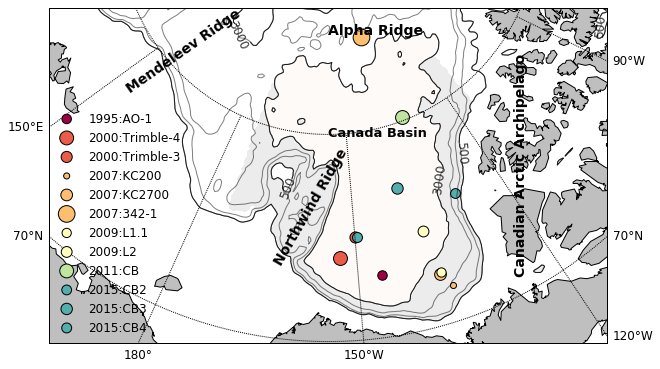

In [35]:
# visualize CB only, with colors & label reorganized
fig = plt.figure(figsize=(10,10))
m = Basemap(width =3e6,height =1.8e6,lon_0=-155, lat_0=78,projection='stere', resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-90.,90.,10.),labels=[1, 1, 0, 0], fontsize=12)
m.drawmeridians(np.arange(-180.,180.,30.),labels=[1, 1, 0, 1], fontsize=12)
x_lon,y_lat = m(np.array(array500['Lon']),np.array(array500['Lat']))
n_lon,n_lat = m(nemolon,nemolat)
m.contour(n_lon,n_lat,bathy,[500,1000,2000,3000,4000],linewidth=0.075,colors='black',alpha=0.5)
CS = m.contour(n_lon,n_lat,bathy,[500,3000],linewidth=0.075,colors='black',alpha=0.8)
plt.clabel(CS, fontsize=12, inline=1,fmt = '%1.0f')
# shade coastal/internal ocean
pbathy = np.zeros_like(bathy)
bathyidx = (np.array(bathy > 500)& np.array(bathy < 3000)); pbathy[bathyidx] = 1
latind = (nemolon<160)&(nemolon>0)
pbathy[(bathy < 500)|(latind)] = np.nan 

shallow=np.load("Untitled Folder/shallow.npy")
deep3=np.load("Untitled Folder/deep.npy")
ind = (shallow!=1);shallow[ind]=np.nan
ind = (deep3!=1);deep3[ind]=np.nan
m.contourf(n_lon,n_lat, np.ma.masked_invalid(deep3), cmap = 'RdGy',alpha = 0.2)
m.contourf(n_lon,n_lat, np.ma.masked_invalid(shallow), cmap = 'RdGy_r',alpha = 1)
#m.pcolor(n_lon,n_lat, np.ma.masked_invalid(pbathy), cmap = 'RdGy',alpha = 0.05)


# plot samples
sortedNames = ['1995:AO-1','2000:Trimble-4','2000:Trimble-3',\
                '2007:KC200','2007:KC2700','2007:342-1','2009:L1.1','2009:L2',\
                '2011:CB','2015:CB2','2015:CB3','2015:CB4' ]

for tempname in sortedNames:
    i = [np.array(array500['Station']) == tempname]
    #if np.array(array500['Lon'])[i]>-180 and np.array(array500['Lon'])[i]<-125 and np.array(array500['Lat'])[i]<85:
        # only make the plot  when measurements are in CB
    if np.array(array500['Station'])[i]== '2015:CB4':
        x_lon[i] = x_lon[i] + 10000 
        # move it right a little so that we can see the one beneath
    m.scatter(x_lon[i],y_lat[i],s=np.array(array500['Th'])[i]*500,\
              c = np.array(array500['color'])[i],label = np.array(array500['Station'])[i][0]) #prop={'weight':'bold'},
plt.legend(loc=4,bbox_to_anchor=(0.255, -0.005),ncol=1,scatterpoints=1,frameon=False)
plt.annotate('Canada Basin',xy=(1.5*1e6,1.11*1e6), fontsize=13,fontweight='bold')
plt.annotate('Canadian Arctic Archipelago',xy=(2.5*1e6,1.5*1e6), fontsize=14,fontweight='bold',rotation=90)
plt.annotate('Mendeleev Ridge',xy=(0.4*1e6,1.75*1e6), fontsize=14,fontweight='bold',rotation=35)
plt.annotate('Alpha Ridge',xy=(1.5*1e6,1.66*1e6), fontsize=14,fontweight='bold')
plt.annotate('Northwind Ridge',xy=(1.2*1e6,1.0*1e6), fontsize=14,fontweight='bold',rotation=60)